<a href="https://colab.research.google.com/github/Spokai3/PhanTichDuLieuVaHocSau/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_data(filename):
  return pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/covid19/'+filename)
dfcovid19 = load_data('countriessample.csv')
dfcovid19.head()

,Date,CountryRegion,Confirmed,Recovered,Deaths
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0
1,1/22/2020,Greece;Europe,NaN,NaN,0.0
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0
3,1/22/2020,India;Asia,0.0,NaN,0.0
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0


***HEATMAP***

**Example 1**

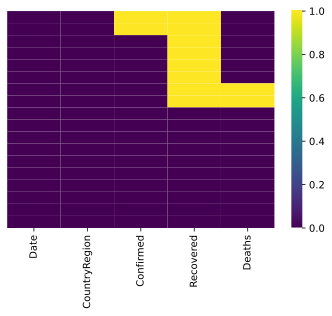

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(dfcovid19.isna(),
            yticklabels=False,
            cbar=True,
            cmap='viridis')

***ÁP DỤNG HÀM (APPLY FUNCTION)***

**Exmaple 2**

In [4]:
#tạo 1 dataframe
df=pd.DataFrame({
    'History':[76, 84, 68, 94],
    'Math':[81, 67, 91, 86],
    'English':[72, 93, 84, 76]
})

#xuất dataframe
print("The original dataframe:\n")
print(df)

#áp dụng hàm
def get_mean(scores):
  return sum(scores)/len(scores)

#lấy kết quả scores(mean) cho từng môn học
result = df.apply(get_mean)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

   History  Math  English
0       76    81       72
1       84    67       93
2       68    91       84
3       94    86       76

The result of applying the function on the dataframe:

History    80.50
Math       81.25
English    81.25
dtype: float64


**Example 3**

In [5]:
#tạo 1 dataframe
df = pd.DataFrame({
    'History':[76, 84, 68, 94],
    'Math':[81, 67, 91, 86],
    'English':[72, 93, 84, 76]
}, index=['Sam', 'Greta', 'Mike', 'Emma'])

#xuất dataframe
print("The original dataframe:\n")
print(df)

#áp dụng hàm
def get_mean(scores):
  return sum(scores)/len(scores)

#lấy kết quả score(mean) cho từng học sinh
result = df.apply(get_mean, axis=1)
print("\nThe result of applying the function on the dataframe:\n")
print(result)


The original dataframe:

       History  Math  English
Sam         76    81       72
Greta       84    67       93
Mike        68    91       84
Emma        94    86       76

The result of applying the function on the dataframe:

Sam      76.333333
Greta    81.333333
Mike     81.000000
Emma     85.333333
dtype: float64


**Example 4**

In [6]:
def split_name_series(string):
  country, region=string.split(';')
  return pd.Series(
      (country, region),
      index='country, region'.split()
  )

In [7]:
def split_name(x_df):
  #Chọn tên cột và áp dụng hàm
  res=x_df['CountryRegion'].apply(split_name_series)
  x_df[res.columns]=res 
  return x_df

***HÀM PIPE()***

**Example 5**

In [8]:
res=load_data('countriessample.csv').pipe(split_name)
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,Africa
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,Europe
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,Europe
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,Asia
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,Asia
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,Asia
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,Asia
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,Europe
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,Africa
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,South America


***HÀM MAP()***

**Example 6**

In [9]:
def subtitute_region(x_df):
  mapping={'Africa':'AF','Asia':'AS','Europe':'EU','South America':'SA','North America':'NA'}
  x_df['region']=x_df['region'].map(mapping)
  return x_df

In [10]:
res=(res.pipe(subtitute_region))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA


***pandas.cut***

**Example 7**

In [11]:
import pandas as pd
import numpy as np
a = pd.cut(np.array([1,7,5,4,6,3]),3)
a

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

**Example 8**

In [12]:
pd.cut(np.array([1,7,5,4,6,3]),bins = 3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

**Example 9**

In [13]:
pd.cut(np.array([1,7,5,4,6,3]), 3, labels=["B", "A", "B"], ordered=False)

['B', 'B', 'A', 'A', 'B', 'B']
Categories (2, object): ['A', 'B']

**Example 10**

In [14]:
def create_evaluation_group(x_df):
  bins=[0.0, 3000, 5000, sys.maxsize]
  labels=['normal', 'medium', 'worst']
  evaluationGroup=pd.cut(x_df['Confirmed'], bins=bins, labels=labels, include_lowest=True)
  x_df['Evaluation']=evaluationGroup
  return x_df

In [15]:
res=(res.pipe(create_evaluation_group))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region,Evaluation
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF,NaN
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU,NaN
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU,normal
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS,normal
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS,normal
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS,normal
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS,normal
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU,normal
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF,medium
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA,normal


***BÀI THỰC HÀNH TRÌNH BÀY DỮ LIỆU***

**Phần 1**

In [16]:
hw=pd.read_csv('/content/drive/MyDrive/DataAnalyst/processed_dulieuxettuyendaihoc.csv')
hw1 = pd.DataFrame(hw)
hw1

,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3
0,1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,5.8,9.0,6.6,8.7,7.2,5.8,7.4,7.4,5.2,6.6,6.9,8.9,8.1,5.8,7.2,7.1,5.9,7.2,6.6,5.8,8.1,5.9,7.4,5.6,6.1,5.7,7.9,5.0,7.4,5.0,6.9,5.7,6.5,7.2,8.4,6.6,7.6,5.9,F,0.0,2NT,3.25,3.25,4.50,A1,7.00,7.54,7.01,K,K,K,2.800,3.016,2.804
1,2,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,5.4,3.2,7.2,5.4,6.1,4.7,4.7,4.3,3.8,3.7,3.7,5.2,6.6,5.8,4.4,4.9,2.8,5.1,4.5,5.6,7.0,7.6,4.7,3.0,4.6,4.4,4.9,4.3,6.3,6.7,4.4,4.0,5.4,4.0,5.2,5.5,6.6,6.1,4.4,M,0.0,1,6.00,4.00,3.50,C,4.69,5.47,5.07,Y,TB,TB,1.876,2.188,2.028
2,3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,6.2,6.1,5.3,7.1,4.0,4.9,2.8,6.3,6.2,5.6,2.5,5.8,5.1,3.7,6.1,6.1,5.8,6.8,4.0,6.4,5.3,4.1,4.8,5.1,6.4,5.1,4.0,6.9,3.9,3.2,5.7,6.6,6.8,6.8,4.1,7.9,8.1,4.6,M,0.0,1,5.00,6.75,4.00,C,5.77,5.38,6.04,TB,TB,TB,2.308,2.152,2.416
3,4,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,6.2,5.5,5.5,4.4,6.5,4.9,4.4,5.9,7.3,5.9,4.9,5.7,6.8,6.8,5.4,4.1,4.4,4.1,7.3,5.3,7.1,7.3,5.6,6.1,4.9,5.3,4.0,6.2,5.5,5.9,6.5,7.4,5.6,6.6,6.8,6.6,7.1,7.3,7.4,M,0.0,1,4.25,4.25,5.25,D1,6.21,5.20,6.88,TB,TB,K,2.484,2.080,2.752
4,5,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,5.5,5.9,7.5,6.5,6.9,7.6,6.4,7.6,7.6,6.7,6.6,5.7,7.9,7.4,7.3,4.4,6.5,5.6,8.3,6.2,4.9,8.6,7.7,6.8,5.4,4.7,5.0,5.1,7.0,7.0,6.3,8.0,6.2,6.8,6.9,6.6,6.1,7.5,7.2,M,0.0,2NT,4.25,4.50,5.00,A,6.50,6.36,6.99,TB,TB,K,2.600,2.544,2.796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,8.6,6.9,7.4,8.8,7.6,5.8,7.3,5.7,8.9,6.8,6.5,7.3,7.0,7.3,6.9,7.6,7.7,5.6,5.9,7.7,6.8,8.1,6.6,7.5,6.7,6.8,6.0,8.3,7.5,7.1,6.8,7.8,7.9,6.7,7.2,6.1,7.2,5.3,5.2,5.2,6.6,6.9,7.4,7.0,7.6,6.3,6.1,6.2,F,0.0,1,5.25,1.50,6.25,C,7.43,7.42,6.83,K,K,K,2.972,2.968,2.732
96,97,3.7,5.4,6.0,5.1,5.5,3.9,6.1,4.4,4.1,4.8,5.1,4.7,5.9,6.9,4.6,5.4,3.1,3.1,5.3,5.8,5.6,5.4,6.6,4.2,3.4,4.9,5.9,6.9,5.6,6.4,5.7,4.3,5.5,4.7,4.6,3.4,6.9,7.6,7.4,4.9,5.7,7.7,5.0,7.0,6.5,7.9,7.5,4.4,F,0.0,1,5.25,3.75,4.75,C,4.93,5.15,6.39,Y,TB,TB,1.972,2.060,2.556
97,98,8.8,5.5,7.4,7.7,6.2,7.3,8.1,4.5,9.5,7.3,6.0,8.4,7.0,8.4,8.8,6.5,9.5,6.6,6.4,7.6,7.0,9.6,9.3,6.7,8.5,6.9,5.8,8.4,8.0,8.9,9.6,7.1,9.0,7.1,6.7,5.7,6.9,8.6,8.6,5.9,8.5,7.1,6.2,8.6,7.0,9.6,8.4,5.8,M,0.0,2NT,7.00,8.00,4.00,C,7.05,7.84,7.67,K,K,K,2.820,3.136,3.068
98,99,2.7,1.8,3.4,5.3,4.5,7.9,4.9,3.8,2.8,5.7,5.1,5.0,5.5,6.6,3.9,4.3,6.2,6.9,7.6,6.3,4.7,7.4,5.9,5.7,5.2,5.1,6.8,5.6,3.8,5.9,6.7,4.4,4.1,5.3,5.7,4.6,5.0,5.9,5.3,4.5,4.3,5.6,6.3,4.7,5.0,6.6,5.2,5.9,M,0.0,1,5.00,3.50,5.50,C,4.15,4.72,5.29,Y,Y,TB,1.660,1.888,2.116


1.Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần

In [17]:
hw1.sort_values(by=['DH1'])

,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3
53,54,4.9,5.9,6.2,5.6,5.9,5.0,7.0,5.6,6.1,7.1,6.4,6.0,6.3,5.5,6.2,6.6,2.5,4.8,5.0,5.0,4.5,2.4,5.8,3.7,6.2,4.1,4.4,5.2,4.1,6.3,4.9,4.6,4.9,5.2,4.9,5.5,5.5,4.6,5.5,5.4,6.5,7.5,6.1,5.6,5.2,5.7,5.6,6.3,M,0.0,1,1.00,5.50,4.25,A,5.69,6.26,6.02,TB,TB,TB,2.276,2.504,2.408
43,44,6.6,7.2,5.9,6.9,7.6,8.1,7.3,6.7,6.3,6.9,6.0,6.4,7.0,7.1,6.9,6.2,6.7,7.1,5.4,6.8,6.8,5.9,6.6,6.8,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,5.8,5.9,5.8,4.6,6.6,4.0,6.0,6.2,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,F,1.0,2,1.25,3.50,5.00,D1,7.05,6.61,6.77,K,K,K,2.820,2.644,2.708
72,73,5.5,6.6,7.2,7.6,5.5,6.7,6.7,5.2,6.0,6.8,6.3,7.2,4.9,4.8,6.6,5.3,4.6,5.5,5.5,7.1,5.2,6.1,7.1,5.4,5.2,4.7,5.8,6.3,5.7,5.6,5.2,5.3,5.2,5.5,6.3,6.6,6.1,6.5,5.3,5.2,6.1,6.2,7.3,7.8,5.5,5.9,6.3,5.5,M,0.0,1,1.50,4.50,5.50,A,6.20,5.88,6.22,TB,TB,TB,2.480,2.352,2.488
5,6,9.3,7.6,7.9,8.6,7.0,7.3,7.7,7.9,9.6,7.8,8.0,8.7,7.7,8.0,9.2,9.1,7.1,8.5,8.1,8.7,7.2,8.4,7.7,8.2,8.5,8.5,7.7,9.2,8.0,6.6,7.3,8.8,8.5,7.6,8.1,9.0,8.4,6.6,6.6,8.2,7.8,6.4,7.2,7.7,7.7,5.7,8.0,7.8,M,0.0,1,1.50,4.00,6.00,D1,7.96,8.54,7.38,K,G,K,3.184,3.416,2.952
87,88,7.3,4.3,5.3,5.8,4.9,3.7,5.6,5.3,5.9,6.0,6.3,5.9,5.0,6.6,6.6,4.6,7.1,6.3,7.3,6.7,6.5,5.4,6.7,5.5,7.7,5.4,7.5,7.1,6.8,5.8,6.8,6.5,7.9,5.9,5.9,5.9,5.7,6.1,6.8,6.7,6.6,6.4,6.9,5.7,6.4,6.4,7.2,6.2,M,0.0,1,1.75,4.00,4.50,A,5.44,5.78,6.48,TB,TB,TB,2.176,2.312,2.592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,8.4,7.4,6.0,7.8,6.3,7.2,8.5,6.0,9.3,7.0,8.5,8.8,6.9,6.9,7.3,6.8,7.4,7.0,8.0,7.5,7.1,6.7,8.4,5.8,7.7,6.7,8.2,7.5,7.5,6.1,8.1,6.5,8.2,5.9,7.9,8.6,6.1,5.1,7.2,6.1,8.6,7.8,8.9,8.5,6.7,5.5,7.9,6.6,M,0.0,1,6.50,4.50,8.00,A,7.23,7.77,7.58,K,K,K,2.892,3.108,3.032
11,12,7.9,7.0,9.1,8.6,6.1,7.0,5.6,9.0,8.2,7.1,8.8,7.6,6.9,7.3,7.2,9.0,8.1,8.4,8.5,7.6,5.5,8.0,6.6,8.6,6.9,7.0,8.9,8.6,5.6,5.3,7.1,8.3,8.0,7.8,8.6,7.3,6.2,3.9,5.7,8.6,8.1,7.9,8.3,7.9,6.4,6.4,6.7,8.7,M,0.0,2,6.75,6.50,4.25,D1,7.43,7.72,7.49,K,K,K,2.972,3.088,2.996
23,24,5.3,6.3,5.7,6.9,5.9,7.5,6.6,5.1,6.4,6.9,4.7,7.4,6.1,8.4,6.4,4.4,6.1,5.8,5.1,7.4,6.7,7.1,6.7,4.3,5.0,3.5,4.5,7.3,6.1,8.8,7.9,3.9,5.3,5.5,6.3,6.7,6.7,7.5,6.7,4.5,6.1,6.8,6.4,6.4,7.6,8.8,6.1,5.2,M,0.0,2NT,6.75,5.25,5.00,C,6.05,6.32,6.71,TB,TB,K,2.420,2.528,2.684
24,25,2.4,4.1,3.6,5.5,5.9,5.6,4.9,4.2,3.3,5.7,4.9,5.3,5.7,4.5,5.6,4.8,3.9,4.6,4.6,6.9,5.7,8.0,5.1,4.7,3.3,5.3,5.6,6.9,7.2,7.3,6.1,3.6,4.4,5.0,4.4,5.6,6.8,4.0,5.0,5.2,3.8,6.3,4.5,6.6,7.1,4.1,5.7,5.1,F,0.0,1,7.00,2.25,5.25,C,4.45,4.88,5.41,Y,Y,TB,1.780,1.952,2.164


2.Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính

In [18]:
hw1.sort_values(by=['GT','DH2'])

,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3
95,96,8.6,6.9,7.4,8.8,7.6,5.8,7.3,5.7,8.9,6.8,6.5,7.3,7.0,7.3,6.9,7.6,7.7,5.6,5.9,7.7,6.8,8.1,6.6,7.5,6.7,6.8,6.0,8.3,7.5,7.1,6.8,7.8,7.9,6.7,7.2,6.1,7.2,5.3,5.2,5.2,6.6,6.9,7.4,7.0,7.6,6.3,6.1,6.2,F,0.0,1,5.25,1.50,6.25,C,7.43,7.42,6.83,K,K,K,2.972,2.968,2.732
25,26,3.6,5.8,6.9,6.1,5.5,7.2,5.5,4.3,4.2,5.4,6.5,5.5,5.8,5.0,5.3,4.3,4.2,4.5,5.3,5.0,5.6,6.4,5.3,4.1,4.8,4.8,4.7,4.6,5.4,4.1,6.3,5.6,5.8,4.9,4.8,6.3,4.8,2.7,4.4,5.0,3.7,4.5,5.7,5.5,5.6,5.9,6.3,4.4,F,0.0,1,4.75,2.00,5.50,C,5.40,5.20,5.09,TB,TB,TB,2.160,2.080,2.036
24,25,2.4,4.1,3.6,5.5,5.9,5.6,4.9,4.2,3.3,5.7,4.9,5.3,5.7,4.5,5.6,4.8,3.9,4.6,4.6,6.9,5.7,8.0,5.1,4.7,3.3,5.3,5.6,6.9,7.2,7.3,6.1,3.6,4.4,5.0,4.4,5.6,6.8,4.0,5.0,5.2,3.8,6.3,4.5,6.6,7.1,4.1,5.7,5.1,F,0.0,1,7.00,2.25,5.25,C,4.45,4.88,5.41,Y,Y,TB,1.780,1.952,2.164
46,47,6.7,6.8,6.4,5.9,5.6,6.4,8.0,6.8,6.6,6.9,7.1,4.6,6.0,6.7,7.8,6.8,7.6,7.0,6.7,7.0,5.9,6.2,8.1,7.5,7.4,6.5,6.6,6.1,6.0,5.4,6.8,6.8,6.1,5.5,6.3,6.5,5.8,5.2,7.9,5.3,6.5,6.9,5.9,7.0,6.0,5.1,6.6,5.1,F,0.0,1,5.25,2.25,5.25,D1,6.49,6.51,6.16,TB,K,TB,2.596,2.604,2.464
13,14,4.9,5.4,5.0,5.0,5.8,7.0,4.2,5.8,4.5,4.5,4.6,5.6,5.9,7.1,6.0,6.5,4.5,6.1,4.2,6.0,6.7,5.9,7.0,5.3,4.6,5.4,4.3,7.3,7.8,5.9,7.5,6.2,6.5,5.8,6.1,6.4,6.9,6.8,6.2,5.8,6.9,5.9,5.7,5.8,6.4,7.3,5.6,5.7,F,0.0,1,2.50,2.75,5.50,D1,5.38,5.51,6.26,TB,TB,TB,2.152,2.204,2.504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,7.3,6.4,6.9,7.5,6.2,8.4,7.6,8.1,8.1,7.0,7.1,8.3,6.8,6.9,9.2,8.7,8.2,6.8,7.7,8.6,7.3,8.3,7.8,8.2,7.9,7.7,7.1,9.2,7.6,7.8,8.4,7.8,8.4,8.4,7.3,7.5,7.2,7.7,7.6,8.6,8.1,8.0,8.1,7.1,8.0,8.8,7.9,7.9,M,0.0,1,3.75,6.00,4.50,B,7.19,7.70,8.00,K,K,G,2.876,3.080,3.200
11,12,7.9,7.0,9.1,8.6,6.1,7.0,5.6,9.0,8.2,7.1,8.8,7.6,6.9,7.3,7.2,9.0,8.1,8.4,8.5,7.6,5.5,8.0,6.6,8.6,6.9,7.0,8.9,8.6,5.6,5.3,7.1,8.3,8.0,7.8,8.6,7.3,6.2,3.9,5.7,8.6,8.1,7.9,8.3,7.9,6.4,6.4,6.7,8.7,M,0.0,2,6.75,6.50,4.25,D1,7.43,7.72,7.49,K,K,K,2.972,3.088,2.996
47,48,7.9,7.6,8.4,8.6,6.2,7.5,8.7,7.7,7.3,7.5,8.0,7.7,5.9,8.5,8.8,8.0,7.8,7.6,8.2,7.6,5.4,6.5,8.2,8.1,9.4,7.6,9.1,8.8,6.2,6.6,8.4,8.4,8.6,8.1,9.0,7.8,5.1,5.2,8.0,7.7,8.1,9.0,9.2,7.5,4.6,5.1,7.0,7.9,M,0.0,2,4.75,6.50,8.00,A,7.67,7.49,7.11,K,K,K,3.068,2.996,2.844
2,3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,6.2,6.1,5.3,7.1,4.0,4.9,2.8,6.3,6.2,5.6,2.5,5.8,5.1,3.7,6.1,6.1,5.8,6.8,4.0,6.4,5.3,4.1,4.8,5.1,6.4,5.1,4.0,6.9,3.9,3.2,5.7,6.6,6.8,6.8,4.1,7.9,8.1,4.6,M,0.0,1,5.00,6.75,4.00,C,5.77,5.38,6.04,TB,TB,TB,2.308,2.152,2.416


3.Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT

In [50]:
hw2=hw1.pivot_table(index=['KT'], values='DH1',aggfunc={'DH1':['sum','count','mean','median','min','max','std',lambda x: np.percentile(x, 25),lambda x: np.percentile(x, 50),lambda x: np.percentile(x, 75)]})
hw2.rename(columns={'<lambda_0>':'Q1','<lambda_1>':'Q2','<lambda_2>':'Q3'})

,Q1,Q2,Q3,count,max,mean,median,min,std,sum
KT,,,,,,,,,,
A,2.2500,3.25,4.250,49,6.50,3.336735,3.25,1.00,1.274296,163.50
A1,2.1875,3.00,3.250,6,4.25,2.916667,3.00,2.00,0.861201,17.50
B,3.2500,3.50,3.750,9,4.50,3.277778,3.50,1.75,0.823905,29.50
C,5.0625,5.25,6.375,14,7.00,5.660714,5.25,4.75,0.812209,79.25
D1,3.0000,3.75,4.875,22,6.75,3.829545,3.75,1.25,1.370146,84.25


4.Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT và KV

In [49]:
hw2=hw1.pivot_table(index=['KT','KV'], values='DH1',aggfunc={'DH1':['sum','count','mean','median','min','max','std',lambda x: np.percentile(x, 25),lambda x: np.percentile(x, 50),lambda x: np.percentile(x, 75)]})
hw2.rename(columns={'<lambda_0>':'Q1','<lambda_1>':'Q2','<lambda_2>':'Q3'})

Q1     Q2      Q3  count  ...  median   min       std    sum
KT KV                                 ...                               
A  1    2.0000  3.250  4.2500     29  ...   3.250  1.00  1.369194  93.75
   2    2.2500  3.500  4.2500      9  ...   3.500  2.00  1.427653  31.75
   2NT  2.8750  3.500  4.1250     11  ...   3.500  2.00  0.913908  38.00
A1 1    2.1875  2.375  2.5625      2  ...   2.375  2.00  0.530330   4.75
   2NT  2.9375  3.250  3.5000      4  ...   3.250  2.00  0.921389  12.75
B  1    3.0000  3.375  3.5625      8  ...   3.375  1.75  0.860207  25.75
   2NT  3.7500  3.750  3.7500      1  ...   3.750  3.75       NaN   3.75
C  1    5.0000  5.250  5.4375      8  ...   5.250  4.75  0.728869  43.50
   2    5.3750  5.750  6.1250      2  ...   5.750  5.00  1.060660  11.50
   2NT  5.2500  6.000  6.8125      4  ...   6.000  5.25  0.943729  24.25
D1 1    2.7500  3.500  4.2500     13  ...   3.500  1.50  1.264658  46.75
   2    3.5625  4.500  5.0000      8  ...   4.500  1.25  1.617082  33.75
   2NT  3.7500  3.750  3.7500      1  ...   3.750  3.75       NaN   3.75

[13 rows x 10 columns]

5.Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT, KV và DT

In [48]:
hw2=hw1.pivot_table(index=['KT','KV','DT'], values='DH1',aggfunc={'DH1':['count','sum','mean','median','min','max','std',lambda x:np.percentile(x,25),lambda x:np.percentile(x,50),lambda x:np.percentile(x,75)]})
hw2.rename(columns={'<lambda_0>':'Q1','<lambda_1>':'Q2','<lambda_2>':'Q3'})

Q1     Q2      Q3  count  ...  median   min       std    sum
KT KV  DT                                 ...                               
A  1   0.0  2.0000  3.250  4.2500     29  ...   3.250  1.00  1.369194  93.75
   2   0.0  2.2500  3.000  4.1875      8  ...   3.000  2.00  1.498511  27.50
       6.0  4.2500  4.250  4.2500      1  ...   4.250  4.25       NaN   4.25
   2NT 0.0  2.8750  3.500  4.1250     11  ...   3.500  2.00  0.913908  38.00
A1 1   0.0  2.1875  2.375  2.5625      2  ...   2.375  2.00  0.530330   4.75
   2NT 0.0  2.9375  3.250  3.5000      4  ...   3.250  2.00  0.921389  12.75
B  1   0.0  3.0000  3.375  3.5625      8  ...   3.375  1.75  0.860207  25.75
   2NT 0.0  3.7500  3.750  3.7500      1  ...   3.750  3.75       NaN   3.75
C  1   0.0  5.0000  5.250  5.4375      8  ...   5.250  4.75  0.728869  43.50
   2   0.0  5.3750  5.750  6.1250      2  ...   5.750  5.00  1.060660  11.50
   2NT 0.0  5.2500  6.000  6.8125      4  ...   6.000  5.25  0.943729  24.25
D1 1   0.0  2.6875  3.625  4.4375     12  ...   3.625  1.50  1.307576  43.75
       1.0  3.0000  3.000  3.0000      1  ...   3.000  3.00       NaN   3.00
   2   0.0  4.1250  4.500  5.0000      7  ...   4.500  3.00  1.171334  32.50
       1.0  1.2500  1.250  1.2500      1  ...   1.250  1.25       NaN   1.25
   2NT 0.0  3.7500  3.750  3.7500      1  ...   3.750  3.75       NaN   3.75

[16 rows x 10 columns]

**Phần 2**

1.Hãy trình bày dữ liệu biến GT:

Gợi ý - Lập bảng tần số và tần suất - Vẽ biểu đồ tần số (cột), biểu đồ tần suất (tròn) và biểu đồ tích lũy tần suất (đa giác tích lũy)

In [53]:
hw2 =hw1['GT'].value_counts()
hw2


M    52
F    48
Name: GT, dtype: int64

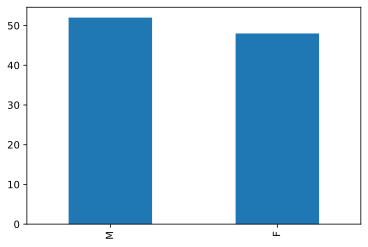

In [54]:
hw2.plot.bar()

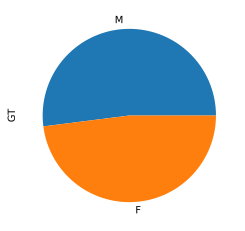

In [55]:
hw2.plot.pie()

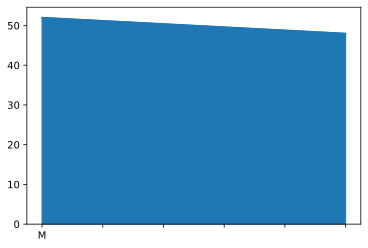

In [56]:
hw2.plot.area()

2.Hãy trình bày dữ liệu lần lượt các biến: US_TBM1, US_TBM2 và US_TBM3

*US_TBM1*

In [72]:
hw2=hw1['US_TBM1'].value_counts()
hw3=hw2.head(10)
hw3

2.048    3
2.972    2
2.276    2
2.720    2
2.724    2
3.136    2
2.676    2
2.696    2
2.800    2
2.600    1
Name: US_TBM1, dtype: int64

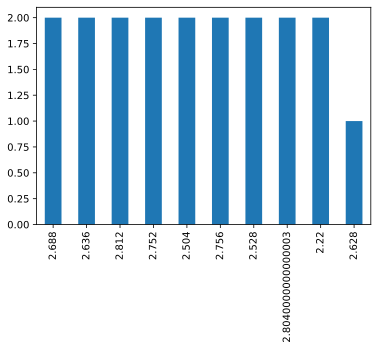

In [83]:
hw3.plot.bar()

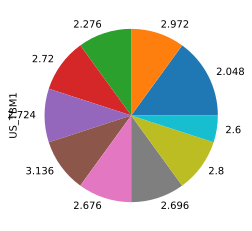

In [71]:
hw3.plot.pie()

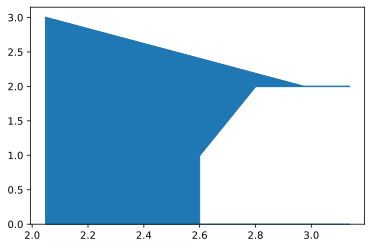

In [70]:
hw3.plot.area()

*US_TBM2*

In [78]:
hw2=hw1['US_TBM2'].value_counts()
hw3=hw2.head(10)

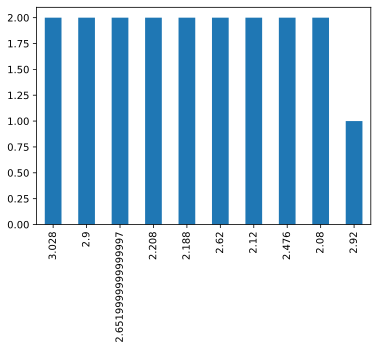

In [75]:
hw3.plot.bar()

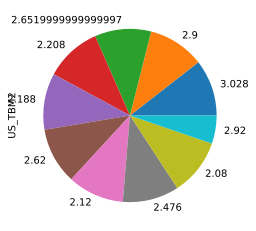

In [76]:
hw3.plot.pie()

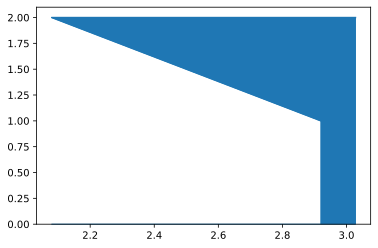

In [77]:
hw3.plot.area()

*US_TBM3*

In [79]:
hw2=hw1['US_TBM3'].value_counts()
hw3=hw2.head(10)

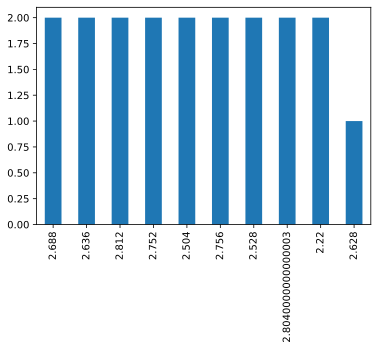

In [80]:
hw3.plot.bar()

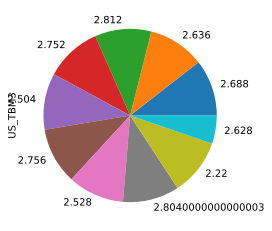

In [81]:
hw3.plot.pie()

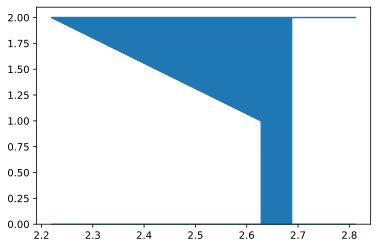

In [82]:
hw3.plot.area()

3.Hãy trình bày dữ liệu biến DT với các học sinh là nam

In [84]:
for i in hw1['GT']:
  if hw1['GT']<0:

SyntaxError: ignored